In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skdt
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv('CO2_emission.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


# Clustering

In [63]:
points = df[['Cylinders','CO2_Emissions']]

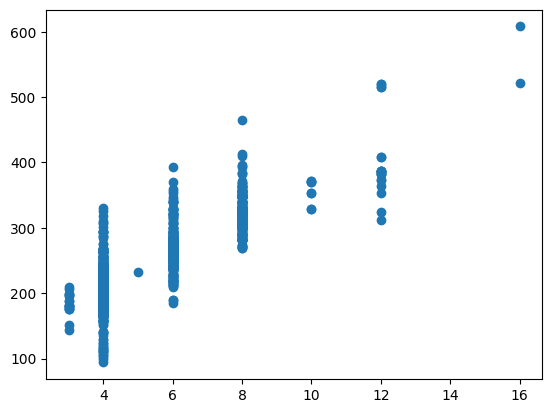

In [64]:
plt.scatter(points['Cylinders'], points['CO2_Emissions'])

In [12]:
model = KMeans(n_clusters=2)

In [23]:
model.fit(points)

KMeans(n_clusters=2)

In [24]:
labels = model.labels_

In [25]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

# Evaluasi Hasil Pemodelan

In [32]:
dfKmeans = pd.DataFrame({'labels': labels, 'Make': df.Make})

In [33]:
ct = pd.crosstab(dfKmeans["labels"], dfKmeans["Make"])
print(ct)

Make    Acura  Alfa Romeo  Aston Martin  Audi  BMW  Bentley  Bugatti  Buick  \
labels                                                                        
0           6           4             0    24   24        0        0      7   
1           0           2             6    19   30        8        2      2   

Make    Cadillac  Chevrolet  ...  Mercedes-Benz  Mitsubishi  Nissan  Porsche  \
labels                       ...                                               
0             17         24  ...             37           5      18       12   
1              5         60  ...             35           0       4       51   

Make    Ram  Rolls-Royce  Subaru  Toyota  Volkswagen  Volvo  
labels                                                       
0         7            0      14      41          14     13  
1         9           10       2       8           2      0  

[2 rows x 38 columns]


# Melihat centroid dari model yang sudah dibuat

In [55]:
centroid = model.cluster_centers_

In [56]:
centroid

array([[  4.40357853, 210.88071571],
       [  7.24537037, 314.00925926]])

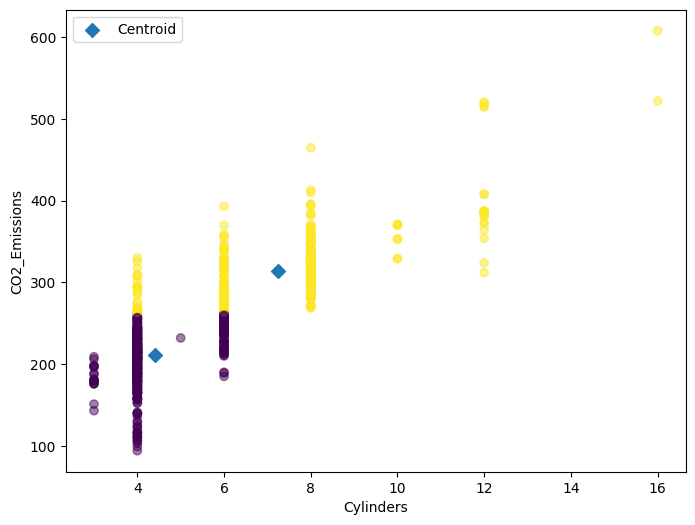

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(points['Cylinders'], points['CO2_Emissions'], alpha = .5, c = labels)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s = 50, label="Centroid")
plt.xlabel("Cylinders")
plt.ylabel("CO2_Emissions")
plt.legend()
plt.show()

# Menentukan Jumlah Cluster (Elbow Method)

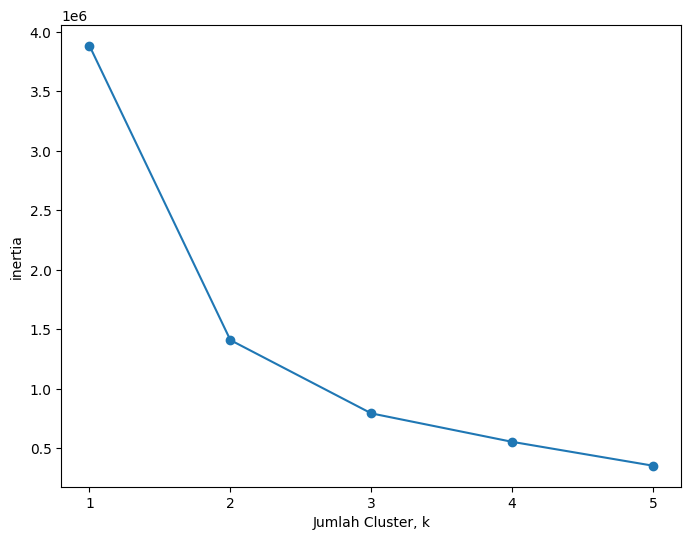

In [78]:
plt.figure(figsize=(8,6))
cluster_sum = range(1, 6)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters = cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.plot(cluster_sum, inertia, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(cluster_sum)
plt.show()